In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
path = kagglehub.dataset_download("kartik2112/fraud-detection")
print("Path to dataset files:", path)

dataset_dir = "/root/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1"
print("Files in dataset directory:", os.listdir(dataset_dir))

train_csv_path = "/root/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1/fraudTrain.csv"
test_csv_path = "/root/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1/fraudTest.csv"

Path to dataset files: /root/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1
Files in dataset directory: ['fraudTrain.csv', 'fraudTest.csv']


In [3]:
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [4]:
print(train_df.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
print(train_df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [8]:
# Check duplicates and number of unique values
print(train_df.duplicated().sum())

0


In [9]:
print(train_df.nunique())

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64


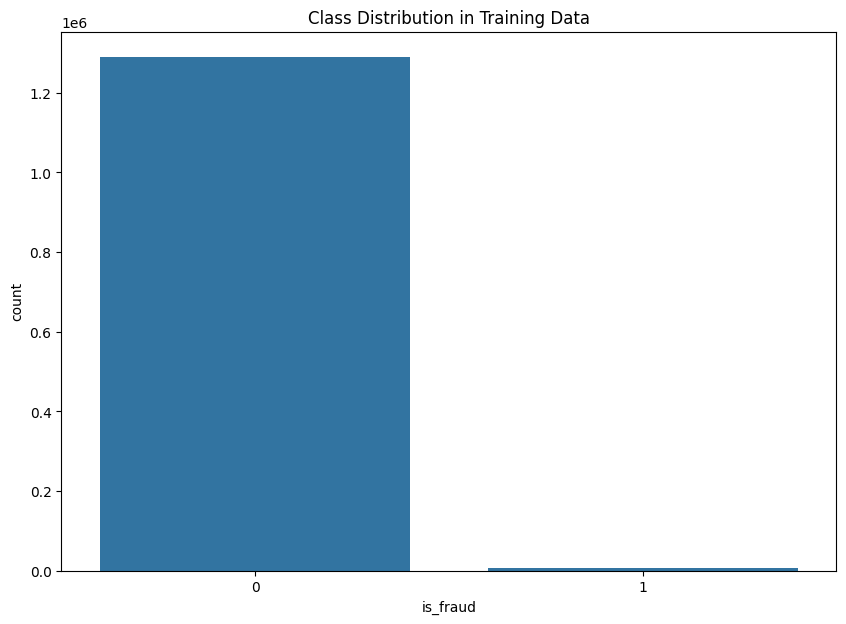

In [10]:
plt.figure(figsize=(10, 7))
sns.countplot(data=train_df, x='is_fraud')
plt.title("Class Distribution in Training Data")
plt.show()

In [11]:
# Drop irrelevant columns
train_df = train_df.drop(columns=['Unnamed: 0', 'cc_num', 'unix_time', 'first', 'last'], axis=1)


train_df['age'] = (pd.to_datetime("2023-12-22") - pd.to_datetime(train_df['dob'])).dt.days // 365
train_df['hour'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.hour

In [12]:
train_df = train_df.drop(columns=["dob", "trans_date_trans_time", 'trans_num'])

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:

categorical_columns = train_df.select_dtypes(include=['object']).columns

le = LabelEncoder()


In [15]:
# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    train_df[col] = le.fit_transform(train_df[col])

In [16]:
train_df.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,hour
0,514,8,4.97,0,568,526,27,28654,36.0788,-81.1781,3495,370,36.011293,-82.048315,0,35,0
1,241,4,107.23,0,435,612,47,99160,48.8878,-118.2105,149,428,49.159047,-118.186462,0,45,0
2,390,0,220.11,1,602,468,13,83252,42.1808,-112.2620,4154,307,43.150704,-112.154481,0,61,0
3,360,2,45.00,1,930,84,26,59632,46.2306,-112.1138,1939,328,47.034331,-112.561071,0,56,0
4,297,9,41.96,1,418,216,45,24433,38.4207,-79.4629,99,116,38.674999,-78.632459,0,37,0


In [17]:
train_df.shape

(1296675, 17)

In [18]:
from sklearn.model_selection import train_test_split

X = train_df.drop('is_fraud', axis=1)
y = train_df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [23]:
y_pred = model.predict(X_test_scaled)

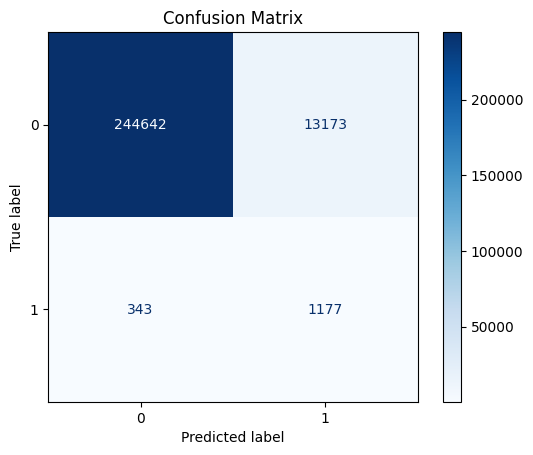

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    257815
           1       0.08      0.77      0.15      1520

    accuracy                           0.95    259335
   macro avg       0.54      0.86      0.56    259335
weighted avg       0.99      0.95      0.97    259335



In [26]:
accuracy_score(y_test, y_pred)

0.947882083020032

Random Forest Implementation

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [28]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [29]:
y_pred_1 = rf_model.predict(X_test)

In [30]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.97      0.76      0.85      1520

    accuracy                           1.00    259335
   macro avg       0.98      0.88      0.93    259335
weighted avg       1.00      1.00      1.00    259335



In [31]:
accuracy_score(y_test, y_pred_1)

0.9984691615092448

In [32]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [33]:
y_pred_2 = rf_model.predict(X_test_scaled)

In [34]:
class_report = classification_report(y_test, y_pred_2)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.97      0.76      0.85      1520

    accuracy                           1.00    259335
   macro avg       0.98      0.88      0.92    259335
weighted avg       1.00      1.00      1.00    259335



In [35]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight=len(y_train) / y_train.value_counts()[1], random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    257815
           1       0.48      0.95      0.64      1520

    accuracy                           0.99    259335
   macro avg       0.74      0.97      0.82    259335
weighted avg       1.00      0.99      0.99    259335



In [36]:
accuracy_score(y_test, xgb_pred)

0.9936568531050571

## using Smote

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [39]:
md = RandomForestClassifier(random_state=42)
md.fit(X_resampled_scaled, y_resampled)

RandomForestClassifier(random_state=42)

In [40]:
X_test_scaled = scaler.transform(X_test)
y_pred = md.predict(X_test_scaled)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.53      0.84      0.65      1520

    accuracy                           0.99    259335
   macro avg       0.77      0.92      0.82    259335
weighted avg       1.00      0.99      1.00    259335



In [41]:
accuracy_score(y_test, y_pred)

0.9947403936992693